In [1]:
# Dependencies.
# Data.
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualization.
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# SKLearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Suppress the warnings.
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read in data.
filepath = "Resources/lending_data.csv"
df = pd.read_csv(filepath)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Check out the data.
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


None

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [4]:
# No nulls.
# All numeric data.
# Loan Status is a 0 or 1 coded label column.
# ... I feel like the data should be scaled.
#     Loan size, borrower income, and total debt are massive compared to the other columns.
# ... but I guess the homework does not want me to do that. So... I won't.

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


<Axes: >

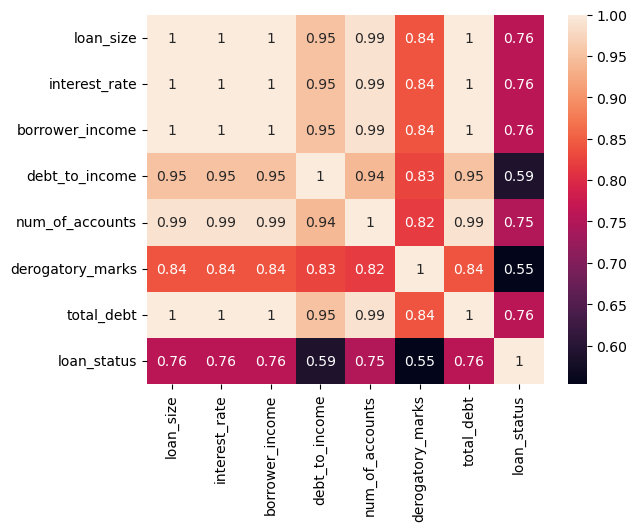

In [5]:
# Check for collinearity.
corrs = df.corr()
display(corrs)
sns.heatmap(
    corrs,
    annot = True
)

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [6]:
# Separate data into labels and features.
features = [
    'loan_size',
    'interest_rate',
    'borrower_income',
    'debt_to_income',
    'num_of_accounts',
    'derogatory_marks',
    'total_debt'
]

labels = ['loan_status']

In [7]:
# Get the X and y variables.
X = df.loc[:, features]
y = df.loc[:, labels]

# Check out the variables.
display(X.head())
display(y.head())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


,loan_status
0,0
1,0
2,0
3,0
4,0


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Generate a testing dataset and training dataset using test_train_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
lr = LogisticRegression(random_state = 1)

lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make training predictions.
tr_preds = lr.predict(X_train)

In [11]:
# Make testing predictions.
ts_preds = lr.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [12]:
# Generate model metrics.
# Training.
tr_cf = confusion_matrix(y_train, tr_preds)
tr_cr = classification_report(y_train, tr_preds)

print(
    f"""
    Training Metrics
    Confusion Matrix -----
    {tr_cf}

    Classification Report -----
    {tr_cr}
    """
)

# Testing.
ts_cf = confusion_matrix(y_test, ts_preds)
ts_cr = classification_report(y_test, ts_preds)

print(
    f"""
    Testing Metrics
    Confusion Matrix -----
    
    {ts_cf}

    Classification Report -----
    
    {ts_cr}
    
    """
)


    Training Metrics
    Confusion Matrix -----
    [[55980   297]
 [  198  1677]]

    Classification Report -----
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.89      0.87      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.94      0.93     58152
weighted avg       0.99      0.99      0.99     58152

    

    Testing Metrics
    Confusion Matrix -----
    
    [[18679    80]
 [   67   558]]

    Classification Report -----
    
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384

    
    


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**  
It seems to have fit the `0` cases better than the `1` cases.  
This could be due to the fact that... the data supports that with having a large number of `0` cases and a relatively small amount of `1` cases.  
Another issue could be the sheer amount of collinearity in the data.
These issues can be fixed...  
1. The issue of collinearity can be fixed by using PCA. This would improve the Logistic Regression model and KNN model.
2. The issue of unbalanced data can be fixed using alternative sampling techniques.

---

In [13]:
# Let's do some more models... but easier this time.
def streamlineModel(model, X_train, X_test, y_train, y_test):
    # Fit the model.
    model.fit(X_train, y_train)

    # Evaluate the model.
    # Predictions.
    tr_preds = model.predict(X_train)
    ts_preds = model.predict(X_test)

    # Probabilities.
    tr_probs = model.predict_proba(X_train)[:, 1]
    ts_probs = model.predict_proba(X_test)[:, 1]

    # Generate metrics.
    # Training.
    tr_cf = confusion_matrix(y_train, tr_preds)
    tr_cr = classification_report(y_train, tr_preds)
    tr_auc = roc_auc_score(y_train, tr_probs)

    print(
        f"""
        Training Metrics / {model}
        
        - Confusion Matrix -------------------------

        {tr_cf}

        - AUC Score --------------------------------

        {tr_auc}

        - Classification Report --------------------

        {tr_cr}
        
        """
    )

    # Testing.
    ts_cf = confusion_matrix(y_test, ts_preds)
    ts_cr = classification_report(y_test, ts_preds)
    ts_auc = roc_auc_score(y_test, ts_probs)

    print(
        f"""
        Testing Metrics / {model}
        
        - Confusion Matrix -------------------------

        {ts_cf}

        - AUC Score --------------------------------

        {ts_auc}

        - Classification Report --------------------

        {ts_cr}
        
        """
    )

    # Vizualize the metrics.
    # Confusion Matrix.
    sns.heatmap(
        ts_cf,
        annot = True,
        fmt = 'd',
        cmap = 'viridis',
        cbar = False,
        xticklabels = ['Predicted Negative', 'Predicted Positive'],
        yticklabels = ['Actual Negative', 'Actual Positive'],
    )

    # ROC (Receiver Operating Characteristic) Curve.
    fpr, tpr, _ = roc_curve(y_test.values, ts_probs)

    # Plot using Seaborn Objects.   
    (so.Plot()
     .add(so.Line(color = 'firebrick'), x = fpr, y = tpr) # ROC Curve.
     .add(so.Line(color = 'cornflowerblue', linestyle = 'dashed'), x = [0, 1], y = [0, 1]) # Comparison Line.
     .layout(size = (8,5))
     .show()
    )


        Training Metrics / DecisionTreeClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[18757     2]
 [   23   602]]

        - AUC Score --------------------------------

        0.9999710858787783

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       1.00      0.96      0.98       625

    accuracy                           1.00     19384
   macro avg       1.00      0.98      0.99     19384
weighted avg       1.00      1.00      1.00     19384

        
        

        Testing Metrics / DecisionTreeClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[55994   283]
 [  263  1612]]

        - AUC Score --------------------------------

        0.949591139068062

        - Classification Report --------------------

                      precision    re

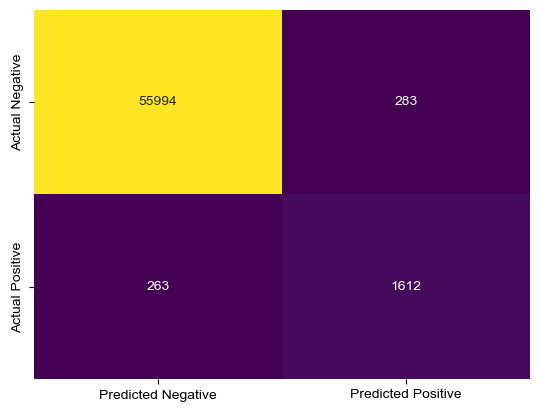

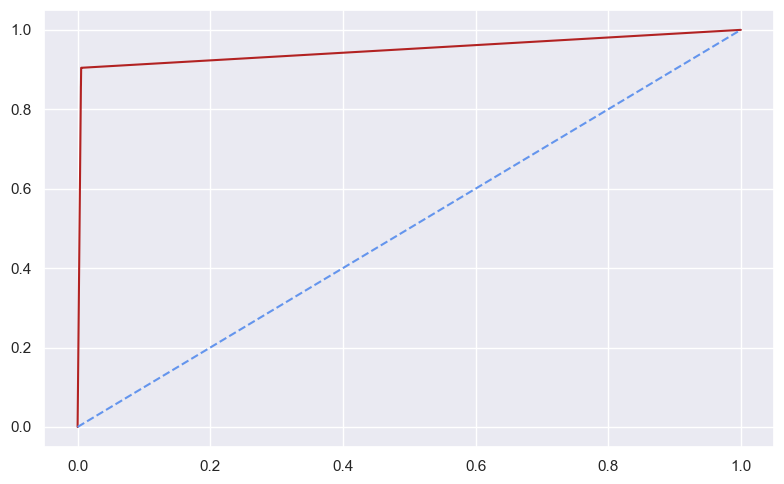

In [14]:
# Decision Tree.
model = DecisionTreeClassifier(random_state = 1)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / RandomForestClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[18739    20]
 [    5   620]]

        - AUC Score --------------------------------

        0.9999557332480409

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.97      0.99      0.98       625

    accuracy                           1.00     19384
   macro avg       0.98      1.00      0.99     19384
weighted avg       1.00      1.00      1.00     19384

        
        

        Testing Metrics / RandomForestClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[55975   302]
 [  175  1700]]

        - AUC Score --------------------------------

        0.994069231361539

        - Classification Report --------------------

                      precision    re

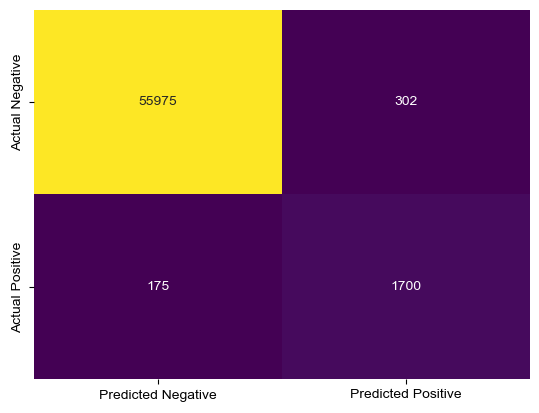

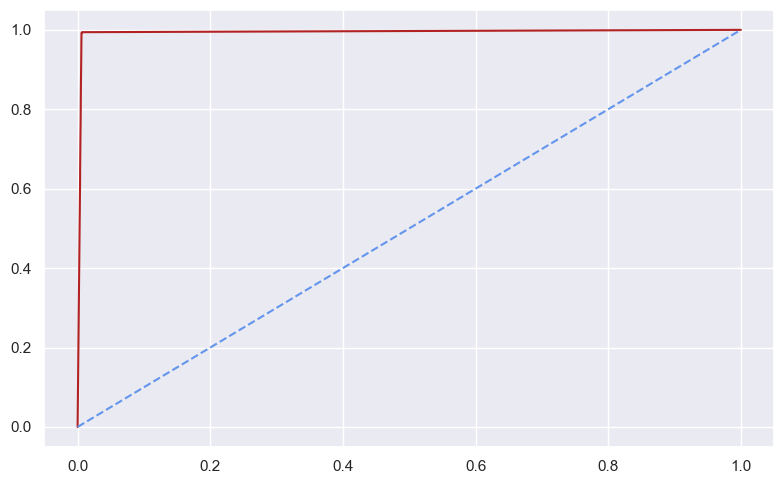

In [15]:
# Random Forest.
model = RandomForestClassifier(random_state = 1)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / SVC(probability=True, random_state=1)
        
        - Confusion Matrix -------------------------

        [[18669    90]
 [    5   620]]

        - AUC Score --------------------------------

        0.9967123194200117

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

        
        

        Testing Metrics / SVC(probability=True, random_state=1)
        
        - Confusion Matrix -------------------------

        [[55951   326]
 [   14  1861]]

        - AUC Score --------------------------------

        0.9942151950767335

        - Classification Report --------------------

                      precision    rec

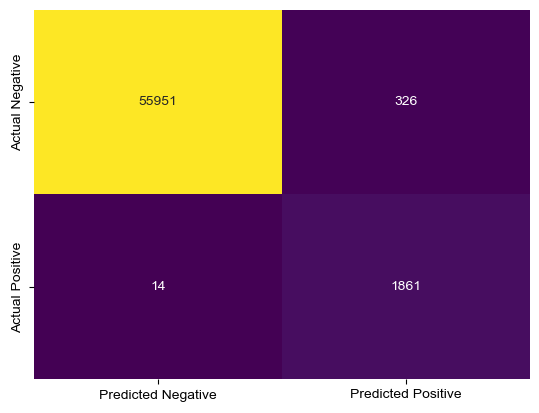

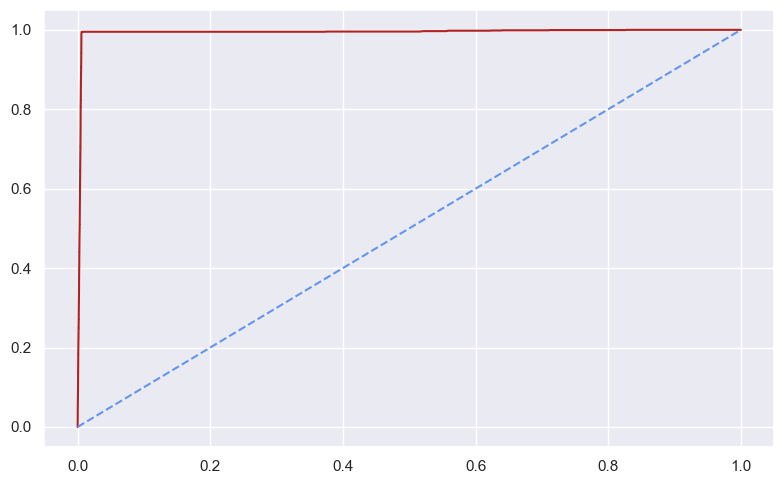

In [16]:
# SVC (Support Vector Classifier).
model = SVC(probability = True, random_state = 1)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / KNeighborsClassifier(n_neighbors=10)
        
        - Confusion Matrix -------------------------

        [[18672    87]
 [    8   617]]

        - AUC Score --------------------------------

        0.9988346073884535

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384

        
        

        Testing Metrics / KNeighborsClassifier(n_neighbors=10)
        
        - Confusion Matrix -------------------------

        [[55952   325]
 [   29  1846]]

        - AUC Score --------------------------------

        0.9941479704556628

        - Classification Report --------------------

                      precision    recal

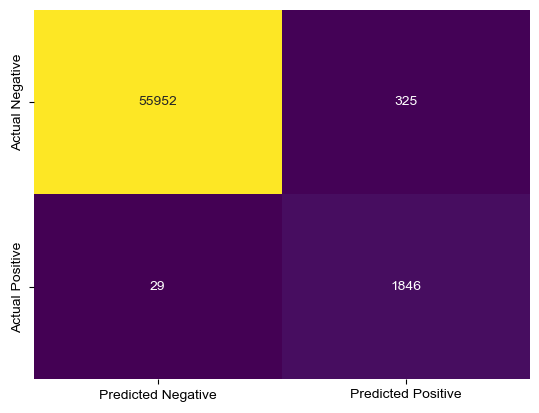

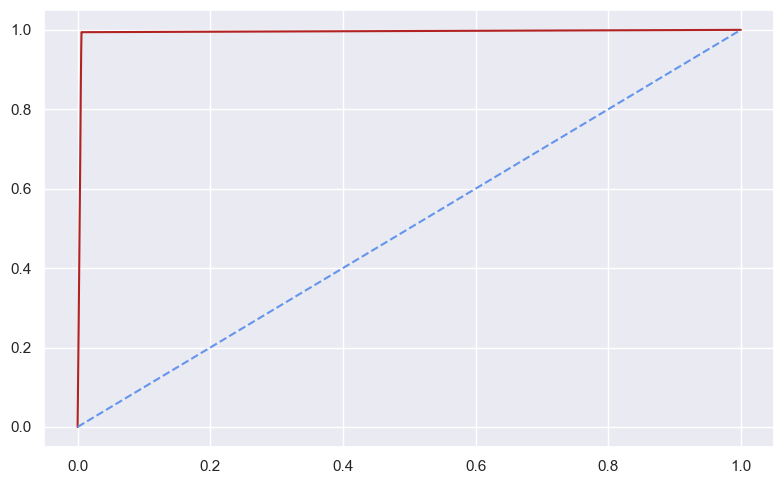

In [17]:
# K Nearest Neighbors.
model = KNeighborsClassifier(n_neighbors = 10)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / ExtraTreesClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[18757     2]
 [   23   602]]

        - AUC Score --------------------------------

        0.9999710858787783

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       1.00      0.96      0.98       625

    accuracy                           1.00     19384
   macro avg       1.00      0.98      0.99     19384
weighted avg       1.00      1.00      1.00     19384

        
        

        Testing Metrics / ExtraTreesClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[55984   293]
 [  220  1655]]

        - AUC Score --------------------------------

        0.9810916857686088

        - Classification Report --------------------

                      precision    recal

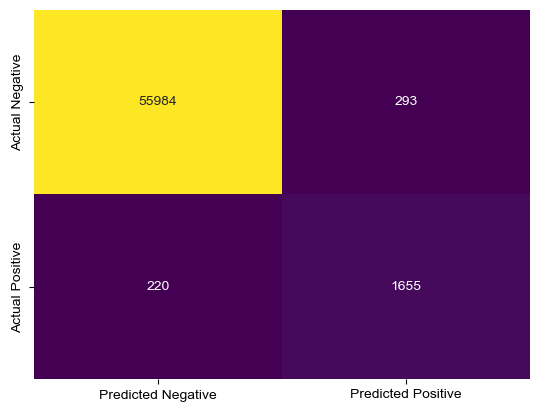

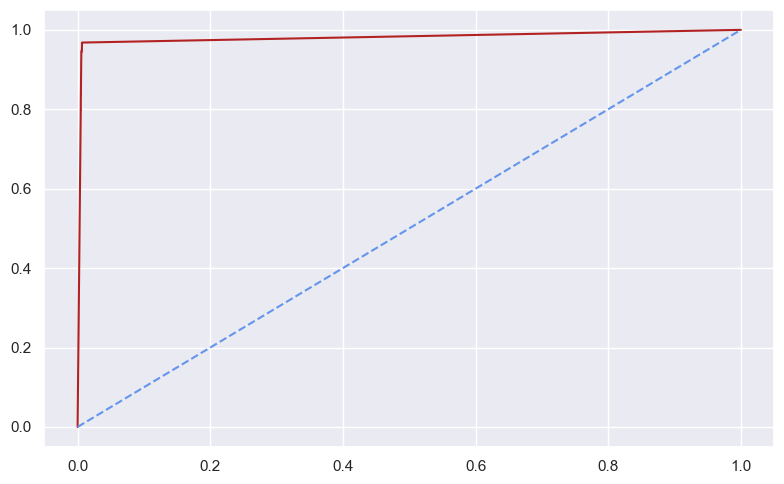

In [18]:
# Extra Trees.
model = ExtraTreesClassifier(random_state = 1)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / AdaBoostClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[18674    85]
 [    4   621]]

        - AUC Score --------------------------------

        0.9986433818433819

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.88      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.97     19384
weighted avg       1.00      1.00      1.00     19384

        
        

        Testing Metrics / AdaBoostClassifier(random_state=1)
        
        - Confusion Matrix -------------------------

        [[55951   326]
 [   34  1841]]

        - AUC Score --------------------------------

        0.9934201230816616

        - Classification Report --------------------

                      precision    recall  f

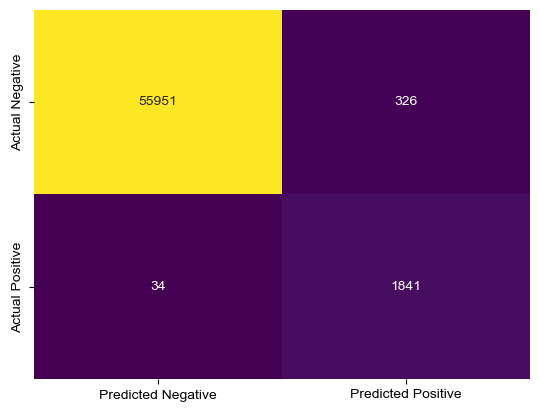

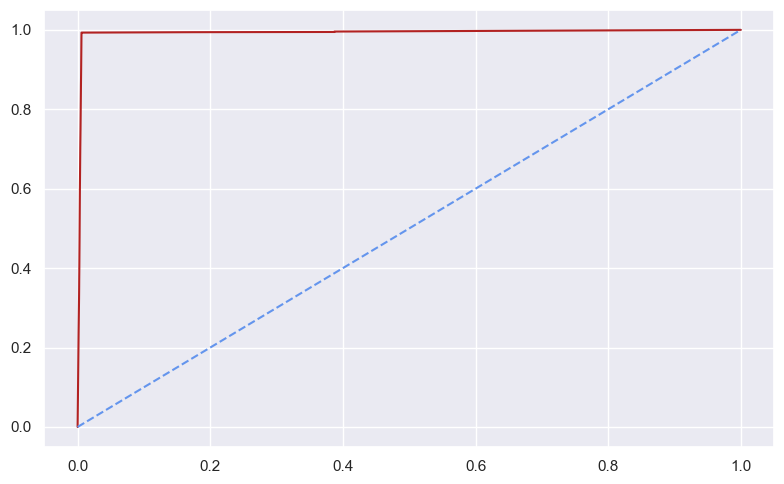

In [19]:
# Ada Boost.
model = AdaBoostClassifier(random_state = 1)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)
        
        - Confusion Matrix -------------------------

        [[18674    85]
 [    5   620]]

        - AUC Score --------------------------------

        0.9988749506903352

        - Classification Report 

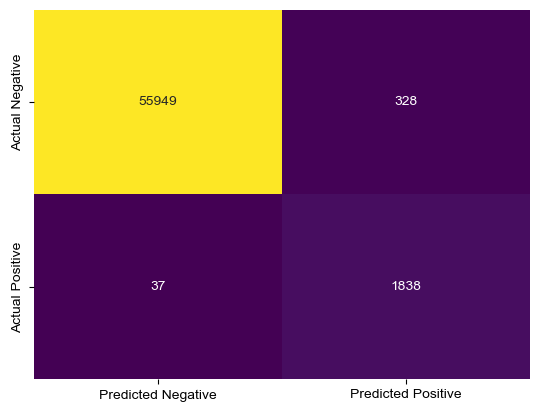

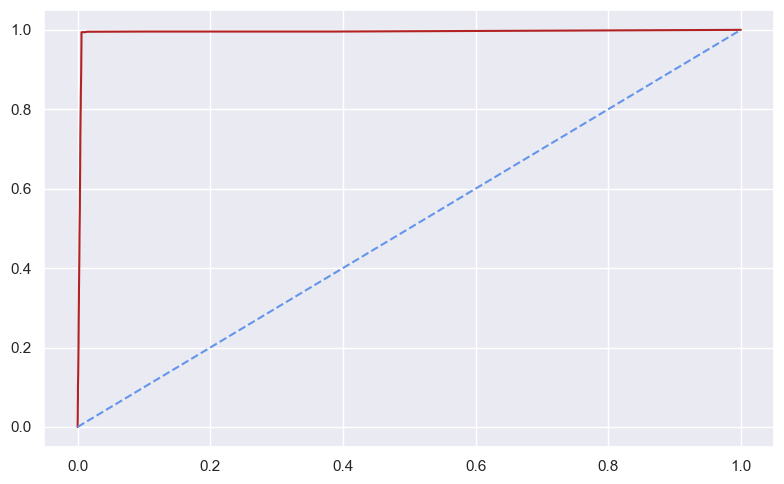

In [20]:
# XG Boost.
model = XGBClassifier(random_state = 1)
streamlineModel(model, X_test, X_train, y_test, y_train)


        Training Metrics / LGBMClassifier(random_state=1, verbose=-1)
        
        - Confusion Matrix -------------------------

        [[55955   322]
 [   14  1861]]

        - AUC Score --------------------------------

        0.9980907771677003

        - Classification Report --------------------

                      precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

        
        

        Testing Metrics / LGBMClassifier(random_state=1, verbose=-1)
        
        - Confusion Matrix -------------------------

        [[18669    90]
 [    4   621]]

        - AUC Score --------------------------------

        0.9959618743003358

        - Classification Report --------------------

                      precis

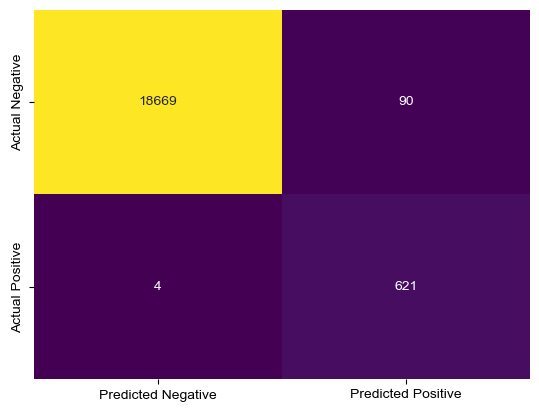

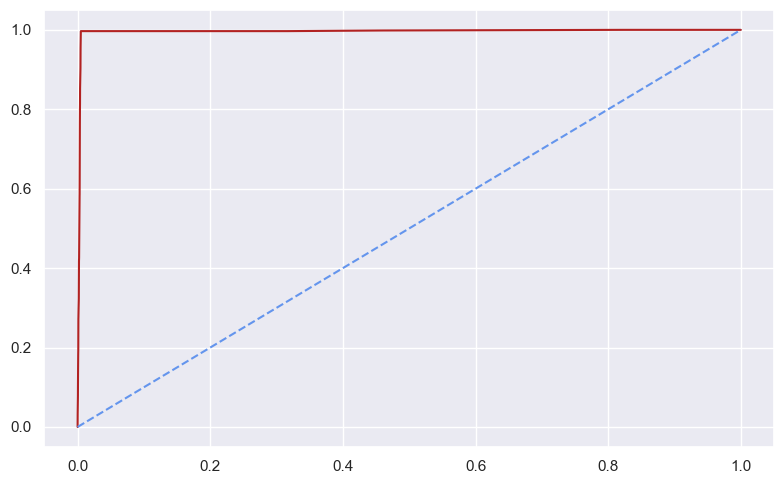

In [21]:
# Light Gradient Boost.
model = LGBMClassifier(random_state = 1, verbose = -1)
streamlineModel(model, X_train, X_test, y_train, y_test)